# Loveida Lucero

# (Core) Preparing Time Series from Wide-Form Data
You will be working with Zillow's publicly available Zillow House Value Index (ZHVI) https://www.zillow.com/research/data/

- Specifically, you will be using the Home Value data set for:
  - Data Type = "ZHVI All Homes (SFR+Condo/Coop) - Time Series - Smoothed - Seasonally Adjusted"
  - Geography = "City"
- We have already downloaded the file for you and uploaded it to Google Drive.
  - Share URL: https://drive.google.com/file/d/1O_g44QAfe3uVF-1heAC0BAeVDoWloVR-/view?usp=sharing
  - Direct URL (for Pandas): https://docs.google.com/spreadsheets/d/e/2PACX-1vQN3Ksa9szQuO4G1-msXWAp17KtVHQCBnuEieu_auu1wSiBf3-krHusIx5VBMkihxj-KZLBosDIGEyR/pub?output=csv

## Task
## Part 1
- First, you will prepare the dataset for time series analysis:
  - Load in the Zillow Home Value Index dataframe.
    - Note: it is a large file and may take a minute to load.
  - Filter the 4 largest cities into a new dataframe.
    - Tip: the "SizeRank" column has already ranked the cities by size. The larger the city, the smaller the rank value.
      - Therefore the 4 largest cities would have rank values of [0,1,2,3]
  - Melt the data to long-form and prepare it for time series analysis.
    - Convert the melted dates into datetime datatype.
    - Make the datetime column the index.
  - Resample the dataframe as monthly frequency, grouped by City.

## Part 2
- Once you've prepared the dataframe with the time series data for the 4 largest cities:
  - Plot the home values for all 4 cities. (Hint: use unstack)
    - Make sure to add a title and axis labels.
    - Reformat the y-axis ticks to use thousands of dollars with a "K" at the end. (e.g. "200K, 400K, etc")
      - Hint: use the FuncFormatter from matplotlib.
  - Answer the following 2 questions using pandas:
    - 1) Which City had the highest Typical Home Value at the end of 2008? Which had the least?
      - Hint: You can use the unstacked dataframe or use pd.IndexSlice with the multiindex.
    - 2) How much did the home values change from November 2008 to December 2008 (in dollars)?
      - Hint: you can use .diff() to calculate the change in values

# Solution

**Imports**

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import os
# set random seed
SEED = 321
np.random.seed(SEED)

## Customization Options,
plt.rcParams['figure.facecolor']='white'
plt.rcParams['figure.figsize']=(12,4)
#import tick customization tools
import matplotlib.ticker as mticks
import matplotlib.dates as mdates
sns.set_context("talk", font_scale=0.9)

**Load Data**

In [2]:
df = pd.read_csv('Data/City_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22467 entries, 0 to 22466
Columns: 281 entries, RegionID to 2022-09-30
dtypes: float64(273), int64(2), object(6)
memory usage: 48.2+ MB


,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,2000-01-31,2000-02-29,...,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,253690.0,255517.0,...,741586.0,745686.0,750578.0,756734.0,762321.0,768797.0,773944.0,777692.0,779960.0,781622.0
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,234181.0,234401.0,...,924019.0,928991.0,937936.0,953874.0,973168.0,990391.0,992337.0,992630.0,978196.0,966595.0
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,109068.0,109079.0,...,245783.0,248718.0,252080.0,256435.0,261101.0,265558.0,268901.0,271059.0,272400.0,272639.0
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,166139.0,166536.0,...,302821.0,305104.0,306404.0,308303.0,309649.0,312487.0,314663.0,315910.0,315587.0,315429.0
4,6915,4,San Antonio,city,TX,TX,"San Antonio-New Braunfels, TX",Bexar County,114794.0,114975.0,...,269323.0,274032.0,278464.0,284127.0,289739.0,294776.0,297727.0,298796.0,299124.0,298951.0


In [3]:
# filter 4 largest cities
cities_filter = df['SizeRank']<= 3
df = df[cities_filter]
df.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,2000-01-31,2000-02-29,...,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,253690.0,255517.0,...,741586.0,745686.0,750578.0,756734.0,762321.0,768797.0,773944.0,777692.0,779960.0,781622.0
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,234181.0,234401.0,...,924019.0,928991.0,937936.0,953874.0,973168.0,990391.0,992337.0,992630.0,978196.0,966595.0
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,109068.0,109079.0,...,245783.0,248718.0,252080.0,256435.0,261101.0,265558.0,268901.0,271059.0,272400.0,272639.0
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,166139.0,166536.0,...,302821.0,305104.0,306404.0,308303.0,309649.0,312487.0,314663.0,315910.0,315587.0,315429.0


In [4]:
# view columns 
df.columns

Index(['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName',
       'State', 'Metro', 'CountyName', '2000-01-31', '2000-02-29',
       ...
       '2021-12-31', '2022-01-31', '2022-02-28', '2022-03-31', '2022-04-30',
       '2022-05-31', '2022-06-30', '2022-07-31', '2022-08-31', '2022-09-30'],
      dtype='object', length=281)

In [5]:
# melt columns to long form
melted = pd.melt(df.drop(columns=['RegionID','SizeRank','Metro',
                                  'CountyName','RegionType','StateName',
                                  'State','RegionID','SizeRank',]),
                 id_vars=['RegionName'],
                 value_name='IndexValue',
                var_name='Date')
melted

,RegionName,Date,IndexValue
0,New York,2000-01-31,253690.0
1,Los Angeles,2000-01-31,234181.0
2,Houston,2000-01-31,109068.0
3,Chicago,2000-01-31,166139.0
4,New York,2000-02-29,255517.0
...,...,...,...
1087,Chicago,2022-08-31,315587.0
1088,New York,2022-09-30,781622.0
1089,Los Angeles,2022-09-30,966595.0
1090,Houston,2022-09-30,272639.0


In [6]:
# change date to datetime 
melted['Date'] = pd.to_datetime(melted['Date'])
# set date as index
melted = melted.set_index("Date")
melted

,RegionName,IndexValue
Date,,
2000-01-31,New York,253690.0
2000-01-31,Los Angeles,234181.0
2000-01-31,Houston,109068.0
2000-01-31,Chicago,166139.0
2000-02-29,New York,255517.0
...,...,...
2022-08-31,Chicago,315587.0
2022-09-30,New York,781622.0
2022-09-30,Los Angeles,966595.0


In [7]:
# groupby by city and set freq to monthly
df_ts = melted.groupby('RegionName').resample("MS").sum()
df_ts

C:\Users\Lovei\AppData\Local\Temp\ipykernel_24384\3101998663.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted.groupby('RegionName').resample("MS").sum()


IndexValue
RegionName Date                  
Chicago    2000-01-01    166139.0
           2000-02-01    166536.0
           2000-03-01    167368.0
           2000-04-01    168826.0
           2000-05-01    170499.0
...                           ...
New York   2022-05-01    768797.0
           2022-06-01    773944.0
           2022-07-01    777692.0
           2022-08-01    779960.0
           2022-09-01    781622.0

[1092 rows x 1 columns]

In [8]:
# create unstacked df
unstacked = df_ts.unstack(level=0)
unstacked

IndexValue                                
RegionName    Chicago   Houston Los Angeles  New York
Date                                                 
2000-01-01   166139.0  109068.0    234181.0  253690.0
2000-02-01   166536.0  109079.0    234401.0  255517.0
2000-03-01   167368.0  108878.0    235513.0  257207.0
2000-04-01   168826.0  108881.0    237589.0  260310.0
2000-05-01   170499.0  108834.0    240113.0  263204.0
...               ...       ...         ...       ...
2022-05-01   312487.0  265558.0    990391.0  768797.0
2022-06-01   314663.0  268901.0    992337.0  773944.0
2022-07-01   315910.0  271059.0    992630.0  777692.0
2022-08-01   315587.0  272400.0    978196.0  779960.0
2022-09-01   315429.0  272639.0    966595.0  781622.0

[273 rows x 4 columns]

In [12]:
def thousands(x,pos):
    """function for use wth matplotlib FuncFormatter -  formats money in millions"""
    new_x = x/1_000
    return f"{new_x:,.0f}K"
# Create the formatter
fmt_thous = mticks.FuncFormatter(thousands)

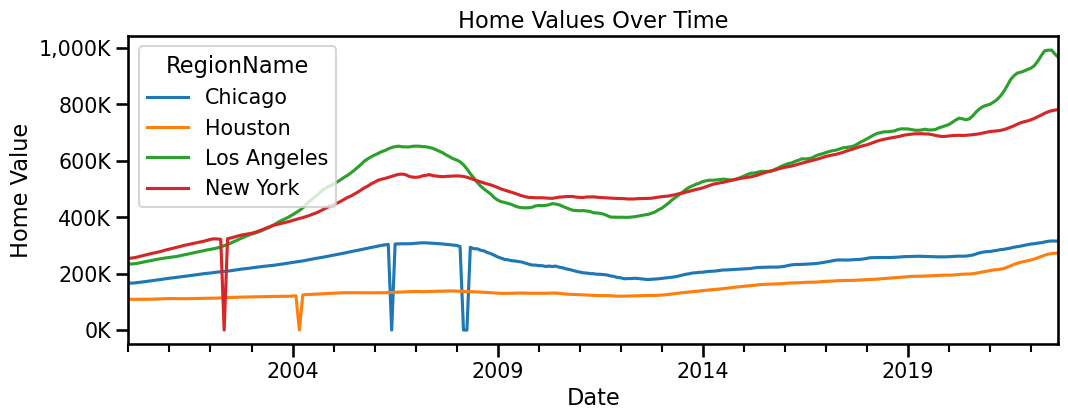

In [14]:
ax = unstacked['IndexValue'].plot()
ax.set_ylabel('Home Value')
ax.set_title('Home Values Over Time')

fmt_thous = mticks.FuncFormatter(thousands)
ax.yaxis.set_major_formatter(fmt_thous)

## 1) Which City had the highest Typical Home Value at the end of 2008? Which had the least?

In [26]:
df_ts.loc[pd.IndexSlice[:, 'December 2008'],:]

,,IndexValue
RegionName,Date,
Chicago,2008-12-01,265306.0
Houston,2008-12-01,131283.0
Los Angeles,2008-12-01,469294.0
New York,2008-12-01,510309.0


- New York had the highest home value than the other citites at the end of 2008 with a value of $510309.0

## 2) How much did the home values change from November 2008 to December 2008 (in dollars)?

In [28]:
# define cities values
ch_value = df_ts.loc['Chicago','IndexValue']
h_value = df_ts.loc['Houston','IndexValue']
la_value = df_ts.loc['Los Angeles','IndexValue']
ny_value = df_ts.loc['New York','IndexValue']

In [29]:
# create df with cities as columns
compare_ts = pd.DataFrame({'Chicago':ch_value,
                          'Houston':h_value,
                          'Los Angeles':la_value,
                          'New York':ny_value})
compare_ts

,Chicago,Houston,Los Angeles,New York
Date,,,,
2000-01-01,166139.0,109068.0,234181.0,253690.0
2000-02-01,166536.0,109079.0,234401.0,255517.0
2000-03-01,167368.0,108878.0,235513.0,257207.0
2000-04-01,168826.0,108881.0,237589.0,260310.0
2000-05-01,170499.0,108834.0,240113.0,263204.0
...,...,...,...,...
2022-05-01,312487.0,265558.0,990391.0,768797.0
2022-06-01,314663.0,268901.0,992337.0,773944.0
2022-07-01,315910.0,271059.0,992630.0,777692.0


In [37]:
# set the time for Nov2008-Dec2008
compare_ts = compare_ts.loc['November 2008':'December 2008']
compare_ts

,Chicago,Houston,Los Angeles,New York
Date,,,,
2008-11-01,271059.0,132247.0,481905.0,514767.0
2008-12-01,265306.0,131283.0,469294.0,510309.0


In [36]:
# get differences
compare_diff = compare_ts.diff().dropna()
compare_diff

,Chicago,Houston,Los Angeles,New York
Date,,,,
2008-12-01,-5753.0,-964.0,-12611.0,-4458.0


- **Chicago:**
    - The price dropped $5,753.0

- **Houston:**
    - The price dropped $964.0

- **Los Angeles:**
    - The price dropped $12,611.0

- **New York:**
    - The price dropped $4,458.0